<a href="https://colab.research.google.com/github/farhan-naqvi/Data-Analysis/blob/main/Combined%20Sentiment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import psutil
def get_size(bytes, suffix="B"):
    factor = 1024
    for unit in ["", "K", "M", "G", "T", "P"]:
        if bytes < factor:
            return f"{bytes:.2f}{unit}{suffix}"
        bytes /= factor
print("="*40, "Memory Information", "="*40)
svmem = psutil.virtual_memory()
print(f"Total: {get_size(svmem.total)}") ; print(f"Available: {get_size(svmem.available)}")
print(f"Used: {get_size(svmem.used)}") ; print(f"Percentage: {svmem.percent}%")

======================================== Memory Information ========================================
Total: 12.69GB
Available: 10.24GB
Used: 3.15GB
Percentage: 19.3%


In [61]:
!nvidia-smi

Sun May 16 13:20:20 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   78C    P0    35W /  70W |    840MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
#Importing the required Libraries

# library used for nlp
import spacy
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline

In [64]:
import warnings 
warnings.filterwarnings('ignore')

In [65]:
# Accessing the file
news = pd.read_csv('/content/drive/MyDrive/india-news-headlines (1).csv')

In [66]:
news = news.iloc[2400000:2600000,:]

In [67]:
news.shape

(200000, 3)

In [68]:
news['headline_category'].value_counts()

india                             7880
city.delhi                        7387
entertainment.hindi.bollywood     7169
city.mumbai                       7099
city.hyderabad                    6739
                                  ... 
entertainment.gujarati.theatre       1
entertainment.events.nashik          1
sports.ipl                           1
life-style.fashion.specials          1
home.auto                            1
Name: headline_category, Length: 353, dtype: int64

In [69]:
election_headline = [cat for cat in news['headline_category'].value_counts().index if 'elections' in cat ]
business_headline = [cat for cat in news['headline_category'].value_counts().index if 'business' in cat ]
needed_headlines = election_headline + business_headline
print(election_headline)
print(business_headline)
print(needed_headlines)

['elections.assembly-elections.uttar-pradesh.news', 'elections.assembly-elections.punjab.news', 'elections.assembly-elections.goa.news', 'elections.assembly-elections.uttarakhand.news', 'elections.assembly-elections.manipur.news', 'elections.news', 'elections.interactives', 'elections.assembly-elections.uttar-pradesh.interactives', 'elections.assembly-elections.uttar-pradesh', 'elections.assembly-elections.punjab', 'elections.assembly-elections.goa']
['business.india-business', 'business.international-business', 'business', 'business.personal-finance']
['elections.assembly-elections.uttar-pradesh.news', 'elections.assembly-elections.punjab.news', 'elections.assembly-elections.goa.news', 'elections.assembly-elections.uttarakhand.news', 'elections.assembly-elections.manipur.news', 'elections.news', 'elections.interactives', 'elections.assembly-elections.uttar-pradesh.interactives', 'elections.assembly-elections.uttar-pradesh', 'elections.assembly-elections.punjab', 'elections.assembly-el

In [70]:
news = news.loc[news['headline_category'].str.find('business')!=-1].reset_index(drop=True)

In [71]:
# news = news.drop(['headline_category'],axis=1)
news.head()

,publish_date,headline_category,headline_text
0,20160531,business.india-business,Tata's 2nd coming in e-commerce; with Cliq
1,20160531,business.india-business,Adani Wilmar; Ruchi Soya ink consumer goods JV
2,20160531,business.india-business,E-pharmacy 1mg raises fresh funds
3,20160531,business.india-business,After Flipkart; L&T Infotech withdraws job offers
4,20160531,business.india-business,M&M to offer petrol version for big volume pro...


In [72]:
# news = news.groupby(['publish_date'])['headline_text'].apply(lambda x: ','.join(x.astype(str))).reset_index()
news['headline_text'] = news.groupby(['publish_date'])['headline_text'].transform(lambda x : ' '.join(x))
# drop duplicate data
news = news.drop_duplicates() 

In [73]:
# news = news.reset_index(drop=True)
news.index = np.arange(0, len(news))

In [74]:
news.head()

,publish_date,headline_category,headline_text
0,20160531,business.india-business,Tata's 2nd coming in e-commerce; with Cliq Ada...
1,20160531,business.international-business,Tata's 2nd coming in e-commerce; with Cliq Ada...
2,20160531,business,Tata's 2nd coming in e-commerce; with Cliq Ada...
3,20160601,business.international-business,IMF economists question faith in neoliberal do...
4,20160601,business.india-business,IMF economists question faith in neoliberal do...


In [75]:
for i in news['headline_text'][0:5]:
  print(i,end="\n")

Tata's 2nd coming in e-commerce; with Cliq Adani Wilmar; Ruchi Soya ink consumer goods JV E-pharmacy 1mg raises fresh funds After Flipkart; L&T Infotech withdraws job offers M&M to offer petrol version for big volume products Consumers don't gain but crude oil slump boosts state-run fuel retailers; govt Pricol revenues up by 49.6% Sundaram Fin Q4 profit up 34% Indian Overseas Bank Q4 net loss narrows Analysts differ on SBI stock target Tokyo shares open lower on profit-taking Viacom independent directors vow to fight any attempted ouster Oil-rich Venezuela scrabbles for dollars New Zealand backs plain packaging for cigarettes Divided OPEC to breathe easier with return of $50 oil Asian stocks gain in thin trade as US rate hike looms Press Release from Business Wire : Business Wire Global Event Services Group Press Release from Business Wire : plista India set to retain fastest growing economy tag Tokyo stocks claw back early losses to end morning up Sensex takes gains forward; climbs 11

In [76]:
# Creating a column in the table with the name "tokenization"
news['tokenization'] = np.nan
news.head(2)

,publish_date,headline_category,headline_text,tokenization
0,20160531,business.india-business,Tata's 2nd coming in e-commerce; with Cliq Ada...,nan
1,20160531,business.international-business,Tata's 2nd coming in e-commerce; with Cliq Ada...,nan


In [77]:
import datetime as dt
# df['publish_date'] = datetime.strptime(df['publish_date'], '%Y%m%d')

news['publish_date'] = news['publish_date'].apply(lambda x:dt.datetime.strptime(str(x),'%Y%m%d'))

In [78]:
nlp = spacy.load('en_core_web_sm')

In [79]:
news.tail()

,publish_date,headline_category,headline_text,tokenization
512,2017-03-11,business.international-business,For this Hyd startup; DeMon turned out to be a...,nan
513,2017-03-12,business.international-business,Northern League leader visit to Naples ignites...,nan
514,2017-03-12,business.india-business,Northern League leader visit to Naples ignites...,nan
515,2017-03-13,business.international-business,Trump aides attack agency that will analyze he...,nan
516,2017-03-13,business.india-business,Trump aides attack agency that will analyze he...,nan


In [80]:
for j in range(len(news)):
    news['tokenization'][j] = nlp(news['headline_text'][j])

news.head()

,publish_date,headline_category,headline_text,tokenization
0,2016-05-31,business.india-business,Tata's 2nd coming in e-commerce; with Cliq Ada...,"(Tata, 's, 2nd, coming, in, e, -, commerce, ;,..."
1,2016-05-31,business.international-business,Tata's 2nd coming in e-commerce; with Cliq Ada...,"(Tata, 's, 2nd, coming, in, e, -, commerce, ;,..."
2,2016-05-31,business,Tata's 2nd coming in e-commerce; with Cliq Ada...,"(Tata, 's, 2nd, coming, in, e, -, commerce, ;,..."
3,2016-06-01,business.international-business,IMF economists question faith in neoliberal do...,"(IMF, economists, question, faith, in, neolibe..."
4,2016-06-01,business.india-business,IMF economists question faith in neoliberal do...,"(IMF, economists, question, faith, in, neolibe..."


In [81]:
# Loading stop words
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [82]:
news['remove stop words']=news['tokenization'].apply(lambda x: [item for item in x if item not in spacy_stopwords])

In [83]:
news['normalized'] = np.nan
for i in range(len(news)):
  news['normalized'][i] = ''.join(str(news['remove stop words'][i])[1:-1])

In [84]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [85]:
vader = SentimentIntensityAnalyzer()

# Set column names
# columns = ['ticker', 'date', 'time', 'headline']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
# parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = news['normalized'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
news = news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
# parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

news.head()

,publish_date,headline_category,headline_text,tokenization,remove stop words,normalized,neg,neu,pos,compound
0,2016-05-31,business.india-business,Tata's 2nd coming in e-commerce; with Cliq Ada...,"(Tata, 's, 2nd, coming, in, e, -, commerce, ;,...","[Tata, 's, 2nd, coming, in, e, -, commerce, ;,...","Tata, 's, 2nd, coming, in, e, -, commerce, ;, ...",0.08,0.76,0.16,0.98
1,2016-05-31,business.international-business,Tata's 2nd coming in e-commerce; with Cliq Ada...,"(Tata, 's, 2nd, coming, in, e, -, commerce, ;,...","[Tata, 's, 2nd, coming, in, e, -, commerce, ;,...","Tata, 's, 2nd, coming, in, e, -, commerce, ;, ...",0.08,0.76,0.16,0.98
2,2016-05-31,business,Tata's 2nd coming in e-commerce; with Cliq Ada...,"(Tata, 's, 2nd, coming, in, e, -, commerce, ;,...","[Tata, 's, 2nd, coming, in, e, -, commerce, ;,...","Tata, 's, 2nd, coming, in, e, -, commerce, ;, ...",0.08,0.76,0.16,0.98
3,2016-06-01,business.international-business,IMF economists question faith in neoliberal do...,"(IMF, economists, question, faith, in, neolibe...","[IMF, economists, question, faith, in, neolibe...","IMF, economists, question, faith, in, neoliber...",0.08,0.83,0.09,0.77
4,2016-06-01,business.india-business,IMF economists question faith in neoliberal do...,"(IMF, economists, question, faith, in, neolibe...","[IMF, economists, question, faith, in, neolibe...","IMF, economists, question, faith, in, neoliber...",0.08,0.83,0.09,0.77


In [86]:
word_cloud_1=''.join(str(e) for e in news['remove stop words'])
word_cloud_1 = word_cloud_1.replace("[","")
word_cloud_1 = word_cloud_1.replace("]"," ")
word_cloud_1 = word_cloud_1.replace(",","")
word_cloud_1

"Tata 's 2nd coming in e - commerce ; with Cliq Adani Wilmar ; Ruchi Soya ink consumer goods JV E - pharmacy 1 mg raises fresh funds After Flipkart ; L&T Infotech withdraws job offers M&M to offer petrol version for big volume products Consumers do n't gain but crude oil slump boosts state - run fuel retailers ; govt Pricol revenues up by 49.6 % Sundaram Fin Q4 profit up 34 % Indian Overseas Bank Q4 net loss narrows Analysts differ on SBI stock target Tokyo shares open lower on profit - taking Viacom independent directors vow to fight any attempted ouster Oil - rich Venezuela scrabbles for dollars New Zealand backs plain packaging for cigarettes Divided OPEC to breathe easier with return of $ 50 oil Asian stocks gain in thin trade as US rate hike looms Press Release from Business Wire : Business Wire Global Event Services Group Press Release from Business Wire : plista India set to retain fastest growing economy tag Tokyo stocks claw back early losses to end morning up Sensex takes gai

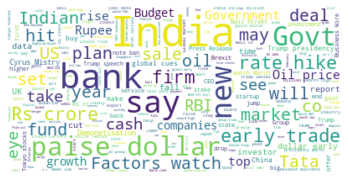

In [87]:
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=50, max_words=1000, background_color="white").generate(word_cloud_1)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#Stock Analysis

In [88]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) # It scales and translates each feature individually such that it is in the given range on the training set

# Reading and accessing the data
df = pd.read_csv("NSE-TATAGLOBAL11.csv")

df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.00,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.00,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.00,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.00,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.00,3486.05


In [89]:
print("Columns :",df.columns)
print("Shape :",df.shape)
df.info()

Columns : Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')
Shape : (1235, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


In [90]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1235.00,168.95,51.50,103.00,137.55,151.50,169.00,327.70
High,1235.00,171.43,52.44,104.60,138.93,153.25,172.32,328.75
Low,1235.00,166.40,50.54,100.00,135.25,149.50,166.70,321.65
Last,1235.00,168.74,51.59,102.60,137.18,151.20,169.10,325.95
Close,1235.00,168.73,51.54,102.65,137.23,151.10,169.50,325.75
Total Trade Quantity,1235.00,2604151.14,2277027.68,100180.00,1284481.50,1964885.00,3095788.50,29191015.00
Turnover (Lacs),1235.00,4843.17,5348.92,128.04,1801.03,3068.51,5852.60,55755.08


In [91]:
# converting the Date column to datetime format
df['Date'] = pd.to_datetime(df.Date,format = "%Y-%m-%d")

# setting the Date as the Index
df.index = df['Date']

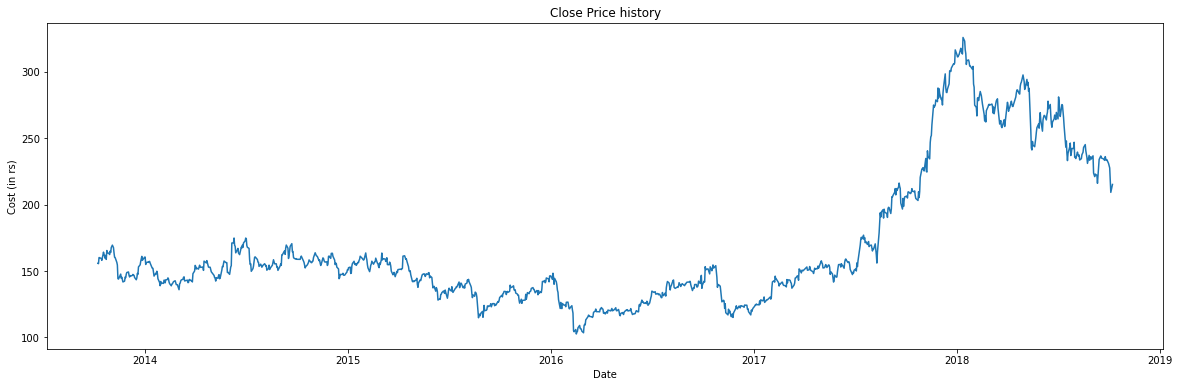

In [92]:
plt.figure(figsize=(20,6))
plt.title("Close Price history")
plt.plot(df['Close'])
plt.xlabel("Date")
plt.ylabel('Cost (in rs)')
plt.show()

In [93]:
data = df.sort_index(ascending=True, axis=0)
# new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
df_new = df.iloc[ : ,[0,5]]

In [94]:
df_new = df_new.sort_index(ascending=True, axis=0)
df_new.head()

,Date,Close
Date,,
2013-10-08,2013-10-08,155.80
2013-10-09,2013-10-09,155.55
2013-10-10,2013-10-10,160.15
2013-10-11,2013-10-11,160.05
2013-10-14,2013-10-14,159.45


In [95]:
train = df_new[:987]
valid = df_new[987:]

In [96]:
from fastai.tabular import *

add_datepart(df_new, 'Date')
df_new.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

df_new.head()

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
Date,,,,,,,,,,,,,
2013-10-08,155.80,2013,10,41,8,1,281,False,False,False,False,False,False
2013-10-09,155.55,2013,10,41,9,2,282,False,False,False,False,False,False
2013-10-10,160.15,2013,10,41,10,3,283,False,False,False,False,False,False
2013-10-11,160.05,2013,10,41,11,4,284,False,False,False,False,False,False
2013-10-14,159.45,2013,10,42,14,0,287,False,False,False,False,False,False


In [97]:
df_new['mon_fri'] = 0
for i in range(0,len(df_new)):
    if (df_new['Dayofweek'][i] > 0 and df_new['Dayofweek'][i] <= 4):
        df_new['mon_fri'][i] = 1
    else:
        df_new['mon_fri'][i] = 0

df_new.head(2)

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
Date,,,,,,,,,,,,,,
2013-10-08,155.80,2013,10,41,8,1,281,False,False,False,False,False,False,1
2013-10-09,155.55,2013,10,41,9,2,282,False,False,False,False,False,False,1


In [98]:
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error

In [99]:
#split into train and validation
train = df_new[:987]
valid = df_new[987:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_valid)

# rms
print(np.sqrt(mean_squared_error(y_valid,y_pred)))

121.15462287227469


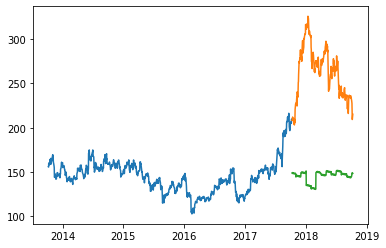

In [100]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = y_pred

valid.index = df_new[987:].index
train.index = df_new[:987].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [101]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

In [102]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print(rms)

115.14974976511127


In [103]:
# merged.columns

927/927 - 6s - loss: 0.0011
12.185950420854569


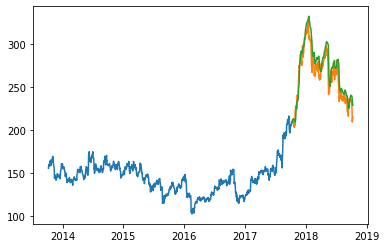

In [104]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)
# Results
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
print(rms)
# 11.772259608962642
#for plotting
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

In [105]:
news.index = news['publish_date']

In [106]:
news.head()

,publish_date,headline_category,headline_text,tokenization,remove stop words,normalized,neg,neu,pos,compound
publish_date,,,,,,,,,,
2016-05-31,2016-05-31,business.india-business,Tata's 2nd coming in e-commerce; with Cliq Ada...,"(Tata, 's, 2nd, coming, in, e, -, commerce, ;,...","[Tata, 's, 2nd, coming, in, e, -, commerce, ;,...","Tata, 's, 2nd, coming, in, e, -, commerce, ;, ...",0.08,0.76,0.16,0.98
2016-05-31,2016-05-31,business.international-business,Tata's 2nd coming in e-commerce; with Cliq Ada...,"(Tata, 's, 2nd, coming, in, e, -, commerce, ;,...","[Tata, 's, 2nd, coming, in, e, -, commerce, ;,...","Tata, 's, 2nd, coming, in, e, -, commerce, ;, ...",0.08,0.76,0.16,0.98
2016-05-31,2016-05-31,business,Tata's 2nd coming in e-commerce; with Cliq Ada...,"(Tata, 's, 2nd, coming, in, e, -, commerce, ;,...","[Tata, 's, 2nd, coming, in, e, -, commerce, ;,...","Tata, 's, 2nd, coming, in, e, -, commerce, ;, ...",0.08,0.76,0.16,0.98
2016-06-01,2016-06-01,business.international-business,IMF economists question faith in neoliberal do...,"(IMF, economists, question, faith, in, neolibe...","[IMF, economists, question, faith, in, neolibe...","IMF, economists, question, faith, in, neoliber...",0.08,0.83,0.09,0.77
2016-06-01,2016-06-01,business.india-business,IMF economists question faith in neoliberal do...,"(IMF, economists, question, faith, in, neolibe...","[IMF, economists, question, faith, in, neolibe...","IMF, economists, question, faith, in, neoliber...",0.08,0.83,0.09,0.77


In [107]:
merged = news.merge(df_new, left_index=True, right_index=True)

In [108]:
merged.shape

(361, 24)

In [109]:
news.shape

(517, 10)

In [110]:
df_new.shape

(1235, 14)

In [111]:
for i in merged.index:
  print(i)

2016-05-31 00:00:00
2016-05-31 00:00:00
2016-05-31 00:00:00
2016-06-01 00:00:00
2016-06-01 00:00:00
2016-06-02 00:00:00
2016-06-02 00:00:00
2016-06-03 00:00:00
2016-06-03 00:00:00
2016-06-03 00:00:00
2016-06-06 00:00:00
2016-06-06 00:00:00
2016-06-06 00:00:00
2016-06-07 00:00:00
2016-06-07 00:00:00
2016-06-07 00:00:00
2016-06-08 00:00:00
2016-06-08 00:00:00
2016-06-08 00:00:00
2016-06-09 00:00:00
2016-06-09 00:00:00
2016-06-09 00:00:00
2016-06-10 00:00:00
2016-06-10 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-14 00:00:00
2016-06-14 00:00:00
2016-06-15 00:00:00
2016-06-15 00:00:00
2016-06-16 00:00:00
2016-06-16 00:00:00
2016-06-17 00:00:00
2016-06-17 00:00:00
2016-06-20 00:00:00
2016-06-20 00:00:00
2016-06-20 00:00:00
2016-06-21 00:00:00
2016-06-21 00:00:00
2016-06-22 00:00:00
2016-06-22 00:00:00
2016-06-23 00:00:00
2016-06-23 00:00:00
2016-06-23 00:00:00
2016-06-24 00:00:00
2016-06-24 00:00:00
2016-06-24 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00


In [112]:
merged.head()

,publish_date,headline_category,headline_text,tokenization,remove stop words,normalized,neg,neu,pos,compound,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
2016-05-31,2016-05-31,business.india-business,Tata's 2nd coming in e-commerce; with Cliq Ada...,"(Tata, 's, 2nd, coming, in, e, -, commerce, ;,...","[Tata, 's, 2nd, coming, in, e, -, commerce, ;,...","Tata, 's, 2nd, coming, in, e, -, commerce, ;, ...",0.08,0.76,0.16,0.98,117.75,2016,5,22,31,1,152,True,False,False,False,False,False,1
2016-05-31,2016-05-31,business.international-business,Tata's 2nd coming in e-commerce; with Cliq Ada...,"(Tata, 's, 2nd, coming, in, e, -, commerce, ;,...","[Tata, 's, 2nd, coming, in, e, -, commerce, ;,...","Tata, 's, 2nd, coming, in, e, -, commerce, ;, ...",0.08,0.76,0.16,0.98,117.75,2016,5,22,31,1,152,True,False,False,False,False,False,1
2016-05-31,2016-05-31,business,Tata's 2nd coming in e-commerce; with Cliq Ada...,"(Tata, 's, 2nd, coming, in, e, -, commerce, ;,...","[Tata, 's, 2nd, coming, in, e, -, commerce, ;,...","Tata, 's, 2nd, coming, in, e, -, commerce, ;, ...",0.08,0.76,0.16,0.98,117.75,2016,5,22,31,1,152,True,False,False,False,False,False,1
2016-06-01,2016-06-01,business.international-business,IMF economists question faith in neoliberal do...,"(IMF, economists, question, faith, in, neolibe...","[IMF, economists, question, faith, in, neolibe...","IMF, economists, question, faith, in, neoliber...",0.08,0.83,0.09,0.77,118.05,2016,6,22,1,2,153,False,True,False,False,False,False,1
2016-06-01,2016-06-01,business.india-business,IMF economists question faith in neoliberal do...,"(IMF, economists, question, faith, in, neolibe...","[IMF, economists, question, faith, in, neolibe...","IMF, economists, question, faith, in, neoliber...",0.08,0.83,0.09,0.77,118.05,2016,6,22,1,2,153,False,True,False,False,False,False,1


In [113]:
merged['sentiment'] = 0
for i in range(0,len(merged)):
    if (merged['compound'][i] >0):
      merged['sentiment'][i] = 1
    else:
      merged['sentiment'][i] = 0

merged.head(10)

,publish_date,headline_category,headline_text,tokenization,remove stop words,normalized,neg,neu,pos,compound,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri,sentiment
2016-05-31,2016-05-31,business.india-business,Tata's 2nd coming in e-commerce; with Cliq Ada...,"(Tata, 's, 2nd, coming, in, e, -, commerce, ;,...","[Tata, 's, 2nd, coming, in, e, -, commerce, ;,...","Tata, 's, 2nd, coming, in, e, -, commerce, ;, ...",0.08,0.76,0.16,0.98,117.75,2016,5,22,31,1,152,True,False,False,False,False,False,1,1
2016-05-31,2016-05-31,business.international-business,Tata's 2nd coming in e-commerce; with Cliq Ada...,"(Tata, 's, 2nd, coming, in, e, -, commerce, ;,...","[Tata, 's, 2nd, coming, in, e, -, commerce, ;,...","Tata, 's, 2nd, coming, in, e, -, commerce, ;, ...",0.08,0.76,0.16,0.98,117.75,2016,5,22,31,1,152,True,False,False,False,False,False,1,1
2016-05-31,2016-05-31,business,Tata's 2nd coming in e-commerce; with Cliq Ada...,"(Tata, 's, 2nd, coming, in, e, -, commerce, ;,...","[Tata, 's, 2nd, coming, in, e, -, commerce, ;,...","Tata, 's, 2nd, coming, in, e, -, commerce, ;, ...",0.08,0.76,0.16,0.98,117.75,2016,5,22,31,1,152,True,False,False,False,False,False,1,1
2016-06-01,2016-06-01,business.international-business,IMF economists question faith in neoliberal do...,"(IMF, economists, question, faith, in, neolibe...","[IMF, economists, question, faith, in, neolibe...","IMF, economists, question, faith, in, neoliber...",0.08,0.83,0.09,0.77,118.05,2016,6,22,1,2,153,False,True,False,False,False,False,1,1
2016-06-01,2016-06-01,business.india-business,IMF economists question faith in neoliberal do...,"(IMF, economists, question, faith, in, neolibe...","[IMF, economists, question, faith, in, neolibe...","IMF, economists, question, faith, in, neoliber...",0.08,0.83,0.09,0.77,118.05,2016,6,22,1,2,153,False,True,False,False,False,False,1,1
2016-06-02,2016-06-02,business.international-business,Fed's Beige Book sees 'mostly modest' US econo...,"(Fed, 's, Beige, Book, sees, ', mostly, modest...","[Fed, 's, Beige, Book, sees, ', mostly, modest...","Fed, 's, Beige, Book, sees, ', mostly, modest,...",0.10,0.81,0.08,-0.65,119.25,2016,6,22,2,3,154,False,False,False,False,False,False,1,0
2016-06-02,2016-06-02,business.india-business,Fed's Beige Book sees 'mostly modest' US econo...,"(Fed, 's, Beige, Book, sees, ', mostly, modest...","[Fed, 's, Beige, Book, sees, ', mostly, modest...","Fed, 's, Beige, Book, sees, ', mostly, modest,...",0.10,0.81,0.08,-0.65,119.25,2016,6,22,2,3,154,False,False,False,False,False,False,1,0
2016-06-03,2016-06-03,business,Cos in niche areas build own talent through ac...,"(Cos, in, niche, areas, build, own, talent, th...","[Cos, in, niche, areas, build, own, talent, th...","Cos, in, niche, areas, build, own, talent, thr...",0.03,0.86,0.11,0.95,120.20,2016,6,22,3,4,155,False,False,False,False,False,False,1,1
2016-06-03,2016-06-03,business.international-business,Cos in niche areas build own talent through ac...,"(Cos, in, niche, areas, build, own, talent, th...","[Cos, in, niche, areas, build, own, talent, th...","Cos, in, niche, areas, build, own, talent, thr...",0.03,0.86,0.11,0.95,120.20,2016,6,22,3,4,155,False,False,False,False,False,False,1,1
2016-06-03,2016-06-03,business.india-business,Cos in niche areas build own talent through ac...,"(Cos, in, niche, areas, build, own, talent, th...","[Cos, in, niche, areas, build, own, talent, th...","Cos, in, niche, areas, build, own, talent, thr...",0.03,0.86,0.11,0.95,120.20,2016,6,22,3,4,155,False,False,False,False,False,False,1,1


In [114]:
merged['sentiment'].value_counts()

1    224
0    137
Name: sentiment, dtype: int64

In [115]:
merged.shape

(361, 25)

In [116]:
new_data = merged[['publish_date', 'Close', 'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
       'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start',
       'Is_year_end', 'Is_year_start', 'mon_fri', 'sentiment']]


new_data.head()

,publish_date,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri,sentiment
2016-05-31,2016-05-31,117.75,2016,5,22,31,1,152,True,False,False,False,False,False,1,1
2016-05-31,2016-05-31,117.75,2016,5,22,31,1,152,True,False,False,False,False,False,1,1
2016-05-31,2016-05-31,117.75,2016,5,22,31,1,152,True,False,False,False,False,False,1,1
2016-06-01,2016-06-01,118.05,2016,6,22,1,2,153,False,True,False,False,False,False,1,1
2016-06-01,2016-06-01,118.05,2016,6,22,1,2,153,False,True,False,False,False,False,1,1


In [175]:
#importing required libraries


# #creating dataframe
# data = df.sort_index(ascending=True, axis=0)
# new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
# for i in range(0,len(data)):
#     new_data['Date'][i] = data['Date'][i]
#     new_data['Close'][i] = data['Close'][i]

# #setting index
# new_data.index = new_data.Date
# new_data.drop('Date', axis=1, inplace=True)

new_data = merged[['Close', 'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
       'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start',
       'Is_year_end', 'Is_year_start', 'mon_fri', 'sentiment']]
new_data = new_data.drop_duplicates()
#creating train and test sets
dataset = new_data.values

train = dataset[0:160,:]
valid = dataset[160:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,160):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose = 2)



100/100 - 3s - loss: 0.0445


In [178]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,15)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)
# print(closing_price)

# go = scaler.fit_transform(y_valid)
# print(go)

# Results
rms=np.sqrt(np.mean(np.power((y_valid-closing_price),2)))
print(rms)
# 11.772259608962642
#for plotting
# train = new_data[:987]
# valid = new_data[987:]
# valid['Predictions'] = closing_price
# plt.plot(train['Close'])
# plt.plot(valid[['Close','Predictions']])

5.145882317251357


In [169]:
y_valid

array([[130.5 ],
       [126.4 ],
       [127.9 ],
       [128.45],
       [128.35],
       [129.2 ],
       [130.45],
       [128.85],
       [130.1 ],
       [137.65],
       [141.85],
       [142.75],
       [141.65],
       [146.15],
       [143.9 ],
       [143.95],
       [141.95],
       [141.2 ],
       [138.75],
       [140.1 ],
       [140.15],
       [141.6 ],
       [141.6 ],
       [140.  ],
       [139.25],
       [138.9 ],
       [138.05],
       [143.6 ],
       [141.1 ],
       [143.35],
       [143.25],
       [142.75],
       [141.4 ],
       [140.8 ],
       [137.1 ]])

In [154]:
inputs

array([[0.68481 , 0.      , 0.545455, 0.568627, ..., 0.      , 0.      , 1.      , 1.      ],
       [0.68481 , 0.      , 0.545455, 0.568627, ..., 0.      , 0.      , 1.      , 1.      ],
       [0.655696, 0.      , 0.636364, 0.588235, ..., 0.      , 0.      , 0.      , 1.      ],
       [0.655696, 0.      , 0.636364, 0.588235, ..., 0.      , 0.      , 0.      , 1.      ],
       ...,
       [0.650633, 1.      , 0.181818, 0.176471, ..., 0.      , 0.      , 1.      , 1.      ],
       [0.650633, 1.      , 0.181818, 0.176471, ..., 0.      , 0.      , 1.      , 1.      ],
       [0.556962, 1.      , 0.181818, 0.176471, ..., 0.      , 0.      , 1.      , 0.      ],
       [0.556962, 1.      , 0.181818, 0.176471, ..., 0.      , 0.      , 1.      , 0.      ]])

In [117]:
new_data = merged[['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
       'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start',
       'Is_year_end', 'Is_year_start', 'mon_fri', 'sentiment','Close']]

In [118]:
new_data.head()

,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri,sentiment,Close
2016-05-31,2016,5,22,31,1,152,True,False,False,False,False,False,1,1,117.75
2016-05-31,2016,5,22,31,1,152,True,False,False,False,False,False,1,1,117.75
2016-05-31,2016,5,22,31,1,152,True,False,False,False,False,False,1,1,117.75
2016-06-01,2016,6,22,1,2,153,False,True,False,False,False,False,1,1,118.05
2016-06-01,2016,6,22,1,2,153,False,True,False,False,False,False,1,1,118.05


In [119]:
new_data = new_data.drop_duplicates()

In [120]:
new_data

,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri,sentiment,Close
2016-05-31,2016,5,22,31,1,152,True,False,False,False,False,False,1,1,117.75
2016-06-01,2016,6,22,1,2,153,False,True,False,False,False,False,1,1,118.05
2016-06-02,2016,6,22,2,3,154,False,False,False,False,False,False,1,0,119.25
2016-06-03,2016,6,22,3,4,155,False,False,False,False,False,False,1,1,120.20
2016-06-06,2016,6,23,6,0,158,False,False,False,False,False,False,0,1,119.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-06,2017,3,10,6,0,65,False,False,False,False,False,False,0,0,143.25
2017-03-07,2017,3,10,7,1,66,False,False,False,False,False,False,1,0,142.75
2017-03-08,2017,3,10,8,2,67,False,False,False,False,False,False,1,1,141.40
2017-03-09,2017,3,10,9,3,68,False,False,False,False,False,False,1,1,140.80


In [121]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(new_data)

#split into train and validation
train = new_data[:160]
valid = new_data[160:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

x_train = x_train.values.reshape(-1,14)
y_train = y_train.values.reshape(-1,1)
x_valid = x_valid.values.reshape(-1,14)
y_valid = y_valid.values.reshape(-1,1)

In [128]:
x_train = np.asarray(x_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')

In [130]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error')
model.fit(x_train, y_train)

ValueError: ignored

In [123]:
model

In [124]:
x_train

array([[2016, 5, 22, 31, ..., False, False, 1, 1],
       [2016, 6, 22, 1, ..., False, False, 1, 1],
       [2016, 6, 22, 2, ..., False, False, 1, 0],
       [2016, 6, 22, 3, ..., False, False, 1, 1],
       ...,
       [2017, 1, 2, 13, ..., False, False, 1, 1],
       [2017, 1, 3, 16, ..., False, False, 0, 1],
       [2017, 1, 3, 17, ..., False, False, 1, 0],
       [2017, 1, 3, 18, ..., False, False, 1, 1]], dtype=object)

In [75]:
#predicting 246 values, using past 60 from the train data
# inputs = new_data[len(new_data) - len(valid) - 60:].values
# inputs = inputs.reshape(-1,14)
inputs  = scaler.transform(x_valid)
X_test = []
for i in range(60,160):
  X_test.append(inputs[i-60:i,:])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)
# Results
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
print(rms)
# 11.772259608962642
#for plotting
# train = new_data[:987]
# valid = new_data[987:]
# valid['Predictions'] = closing_price
# plt.plot(train['Close'])
# plt.plot(valid[['Close','Predictions']])

ValueError: ignored

In [131]:
inputs.shape

(308, 1)

In [77]:
!pip install lazypredict

     |████████████████████████████████| 25.9MB 118kB/s 
     |████████████████████████████████| 307kB 45.9MB/s 
     |████████████████████████████████| 92kB 12.6MB/s 
     |████████████████████████████████| 1.2MB 42.1MB/s 
     |████████████████████████████████| 276kB 49.0MB/s 
     |████████████████████████████████| 14.5MB 221kB/s 
     |████████████████████████████████| 10.1MB 42.2MB/s 
     |████████████████████████████████| 256kB 47.2MB/s 
     |████████████████████████████████| 127.6MB 73kB/s 
     |████████████████████████████████| 81kB 10.9MB/s 
     |████████████████████████████████| 6.8MB 34.8MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44620 sha256=c2f634f4531da8f6c4e85b55da5f39b73518e8b6e068d0868401f6db092a3e44
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built PyYAML
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.19.1 which i

In [126]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

# a = df.iloc[:,:-1].values.reshape(-1,14)
# b = df.iloc[:,-1].values.reshape(-1,1)
# X_train, X_test, y_train, y_test = train_test_split( a , b , test_size=0.3, random_state=0)

clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
model,predictions = clf.fit(x_train, x_valid, y_train, y_valid)

print(model)

100%|██████████| 42/42 [00:02<00:00, 15.53it/s]

Empty DataFrame
Columns: [Adjusted R-Squared, R-Squared, RMSE, Time Taken]
Index: []
